## Observations and Insights 

In [ ]:
* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.
Observation 1: It was sound to have a sample that used almost approximately the same amount of male and female mice.
Observation 2: For mouse i738, tumor volume shrank drastically by day 45 when using the Capomulin regimen.
Observation 3: Among mice in the Capomulin treatment group, there is a strong positive correlation between weight and average tumor volume. Linear regression show that weight is a predictor of tumor volume as well.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_studydata_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_studydata_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
combined_studydata_df['Mouse ID'].value_counts()

g989    13
o926    10
m269    10
i177    10
m650    10
        ..
l872     1
u153     1
h428     1
v199     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
combined_studydata_df['Mouse ID'].count()

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

new_data = combined_studydata_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
new_data['Mouse ID'].count()


1888

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
new_data ['Mouse ID'].nunique()

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_counts = new_data["Drug Regimen"].value_counts()
regimen_counts


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

In [11]:
regimen_group = new_data.groupby('Drug Regimen')


In [12]:
regimen_frame= pd.DataFrame()
regimen_frame['Regimen Mean'] = regimen_group ["Tumor Volume (mm3)"].mean()
regimen_frame['Regimen Count'] = regimen_group ["Tumor Volume (mm3)"].count()
regimen_frame['Regimen Median'] = regimen_group ["Tumor Volume (mm3)"].median()
regimen_frame['Regimen STD'] = regimen_group ["Tumor Volume (mm3)"].std()
regimen_frame['Regimen Variance'] = regimen_group ["Tumor Volume (mm3)"].var()
regimen_frame['Regimen SEM'] = regimen_group ["Tumor Volume (mm3)"].sem()
regimen_frame

,Regimen Mean,Regimen Count,Regimen Median,Regimen STD,Regimen Variance,Regimen SEM
Drug Regimen,,,,,,
Capomulin,40.675741,230,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,178,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,178,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,188,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,186,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,181,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,156,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,228,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,181,52.431737,7.710419,59.450562,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [15]:
aggregate = new_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['count', 'mean','median','std','var','sem'])
aggregate

,count,mean,median,std,var,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,156,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

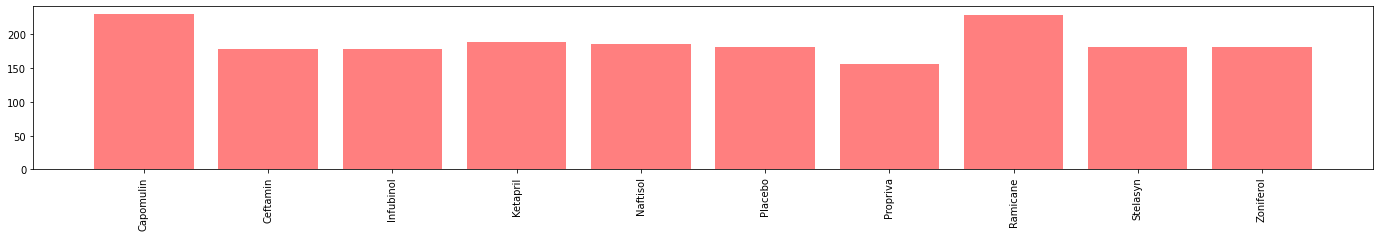

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using plyplot.
plt.figure(figsize=(24,3))
plt.bar(regimen_frame.index, regimen_frame["Regimen Count"], color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")

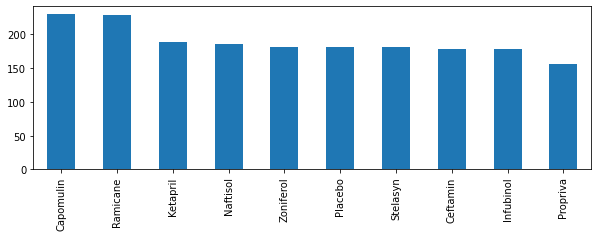

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

regimen_counts.plot(kind="bar", figsize=(10,3))

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# NEED HELP HERE

gender_counts = new_data["Sex"].value_counts()
gender_counts

Male      958
Female    930
Name: Sex, dtype: int64

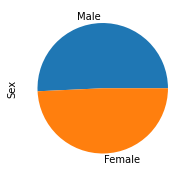

In [19]:
gender_counts.plot(kind="pie", figsize=(10,3))

([<matplotlib.patches.Wedge at 0x286027e4e20>,
 [Text(-0.6872462450269542, -0.8588903298421469, 'Male'),
  Text(0.6872463254420675, 0.8588902654975058, 'Female')],
 [Text(-0.37486158819652043, -0.46848563445935276, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

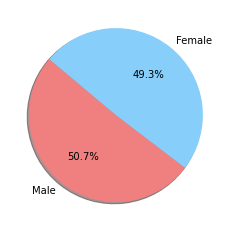

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 930]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [21]:
regimen_group2 = new_data.groupby(['Mouse ID']) ['Timepoint'].max()
regimen_group2

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [22]:
merge_df= pd.merge(regimen_group2, new_data, on="Mouse ID")
merge_df

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1883,z969,45,Naftisol,Male,9,30,25,63.145652,2
1884,z969,45,Naftisol,Male,9,30,30,65.841013,3
1885,z969,45,Naftisol,Male,9,30,35,69.176246,4
1886,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_treaments = ["Capomlin", "Ramicane", "Infubinol", "Ceftamin"]

In [24]:
# Put treatments into a list for for loop (and later for plot labels)
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset    
    # Determine outliers using upper and lower bound
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [25]:
capomulin = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = merge_df.loc[merge_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = merge_df.loc[merge_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = merge_df.loc[merge_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

In [26]:
## DRUG 1- capomulin
Drug_1= pd.Series(capomulin)

Drug1_quartiles = capomulin.quantile([.25,.5,.75])
Drug1_lowerq = Drug1_quartiles[0.25]
Drug1_upperq = Drug1_quartiles[0.75]
Drug1_iqr = Drug1_upperq- Drug1_lowerq

print(f"The lower quartile is: {Drug1_lowerq}")
print(f"The upper quartile  is: {Drug1_upperq}")
print(f"The interquartile range is: {Drug1_iqr}")
print(f"The the median  is: {Drug1_quartiles[0.5]} ")

Drug1_lower_bound = Drug1_lowerq - (1.5*Drug1_iqr)
Drug1_upper_bound = Drug1_upperq + (1.5*Drug1_iqr)
print(f"Values below {Drug1_lower_bound} could be outliers.")
print(f"Values above {Drug1_upper_bound} could be outliers.")

Drug1_outliers = [x for x in capomulin if x < Drug1_lower_bound or x > Drug1_upper_bound]
len(Drug1_outliers)

Drug1_outliers_distinct = list(set(Drug1_outliers))
len(Drug1_outliers_distinct)

Drug1_outliers_distinct.sort()
Drug1_outliers_distinct

    

The lower quartile is: 37.685932865
The upper quartile  is: 45.0
The interquartile range is: 7.314067135000002
The the median  is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


[23.34359787, 25.47214326]

In [27]:
## DRUG 2- ramicane

Drug_2= pd.Series(ramicane)

Drug2_quartiles = ramicane.quantile([.25,.5,.75])
Drug2_lowerq = Drug2_quartiles[0.25]
Drug2_upperq = Drug2_quartiles[0.75]
Drug2_iqr = Drug2_upperq- Drug2_lowerq

print(f"The lower quartile is: {Drug2_lowerq}")
print(f"The upper quartile  is: {Drug2_upperq}")
print(f"The interquartile range  is: {Drug2_iqr}")
print(f"The the median  is: {Drug2_quartiles[0.5]} ")

Drug2_lower_bound = Drug2_lowerq - (1.5*Drug2_iqr)
Drug2_upper_bound = Drug2_upperq + (1.5*Drug2_iqr)
print(f"Values below {Drug2_lower_bound} could be outliers.")
print(f"Values above {Drug2_upper_bound} could be outliers.")

Drug2_outliers = [x for x in ramicane if x < Drug2_lower_bound or x > Drug2_upper_bound]
len(Drug2_outliers)

Drug2_outliers_distinct = list(set(Drug2_outliers))
len(Drug2_outliers_distinct)

Drug2_outliers_distinct.sort()
Drug2_outliers_distinct

    

The lower quartile is: 36.67463458499999
The upper quartile  is: 45.0
The interquartile range  is: 8.325365415000007
The the median  is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


[22.05012627]

In [28]:
## DRUG 3- infubinol

Drug_3= pd.Series(infubinol)

Drug3_quartiles = infubinol.quantile([.25,.5,.75])
Drug3_lowerq = Drug3_quartiles[0.25]
Drug3_upperq = Drug3_quartiles[0.75]
Drug3_iqr = Drug3_upperq- Drug3_lowerq

print(f"The lower quartile is: {Drug3_lowerq}")
print(f"The upper quartile  is: {Drug3_upperq}")
print(f"The interquartile range  is: {Drug3_iqr}")
print(f"The the median  is: {Drug3_quartiles[0.5]} ")

Drug3_lower_bound = Drug3_lowerq - (1.5*Drug3_iqr)
Drug3_upper_bound = Drug3_upperq + (1.5*Drug3_iqr)
print(f"Values below {Drug3_lower_bound} could be outliers.")
print(f"Values above {Drug3_upper_bound} could be outliers.")

Drug3_outliers = [x for x in infubinol if x < Drug3_lower_bound or x > Drug3_upper_bound]
len(Drug3_outliers)

Drug3_outliers_distinct = list(set(Drug3_outliers))
len(Drug3_outliers_distinct)

Drug3_outliers_distinct.sort()
Drug3_outliers_distinct

    

The lower quartile is: 47.3123533
The upper quartile  is: 57.314443967500004
The interquartile range  is: 10.002090667500006
The the median  is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


[]

In [29]:
## DRUG 4- ceftamin


Drug_4= pd.Series(ceftamin)

Drug4_quartiles = ceftamin.quantile([.25,.5,.75])
Drug4_lowerq = Drug4_quartiles[0.25]
Drug4_upperq = Drug4_quartiles[0.75]
Drug4_iqr = Drug4_upperq- Drug4_lowerq

print(f"The lower quartile is: {Drug4_lowerq}")
print(f"The upper quartile  is: {Drug4_upperq}")
print(f"The interquartile range  is: {Drug4_iqr}")
print(f"The the median  is: {Drug4_quartiles[0.5]} ")

Drug4_lower_bound = Drug4_lowerq - (1.5*Drug4_iqr)
Drug4_upper_bound = Drug4_upperq + (1.5*Drug4_iqr)
print(f"Values below {Drug4_lower_bound} could be outliers.")
print(f"Values above {Drug4_upper_bound} could be outliers.")

Drug4_outliers = [x for x in ceftamin if x < Drug4_lower_bound or x > Drug4_upper_bound]
len(Drug4_outliers)

Drug4_outliers_distinct = list(set(Drug4_outliers))
len(Drug4_outliers_distinct)

Drug4_outliers_distinct.sort()
Drug4_outliers_distinct

    

The lower quartile is: 47.208427112500004
The upper quartile  is: 56.801437570000004
The interquartile range  is: 9.5930104575
The the median  is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


[]

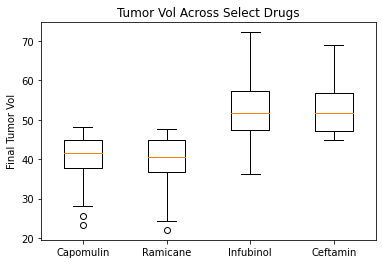

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Vol Across Select Drugs')
ax1.set_ylabel('Final Tumor Vol')
ax1.boxplot([Drug_1, Drug_2, Drug_3, Drug_4], showfliers=True)
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane','Infubinol','Ceftamin'])
plt.show()


## Line and Scatter Plots

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = new_data.loc[new_data['Drug Regimen'] == 'Capomulin']
capomulin_data['Mouse ID'].value_counts()

b128    10
r944    10
s710    10
y793    10
v923    10
i738    10
r554    10
g316    10
j119    10
w914    10
m957    10
s185    10
l897    10
g288    10
i557    10
l509    10
m601    10
u364    10
t565    10
b742    10
x401    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

In [32]:
cap_mouse = capomulin_data[capomulin_data['Mouse ID'].isin(['i738'])]
cap_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0
199,i738,Capomulin,Female,23,20,20,38.531136,0
200,i738,Capomulin,Female,23,20,25,34.973438,0
201,i738,Capomulin,Female,23,20,30,35.578780,1
202,i738,Capomulin,Female,23,20,35,36.175953,1
203,i738,Capomulin,Female,23,20,40,36.843898,2
204,i738,Capomulin,Female,23,20,45,37.311846,2


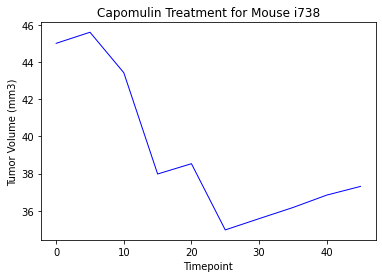

In [33]:
x_axis= cap_mouse ["Timepoint"]

y_axis= cap_mouse ["Tumor Volume (mm3)"]
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Treatment for Mouse i738")

test_mouse_i738, = plt.plot(x_axis, y_axis, color="blue", linewidth=1, label="test")

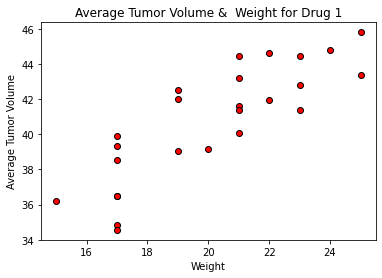

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


capomulin_data = new_data.loc[new_data['Drug Regimen'] == 'Capomulin']

capomulin_average = capomulin_data.groupby(['Mouse ID']).mean()

x_axis_2= capomulin_average ["Weight (g)"]

y_axis_2= capomulin_average ["Tumor Volume (mm3)"]

plt.xlabel("Weight")

plt.ylabel("Average Tumor Volume")

plt.title("Average Tumor Volume &  Weight for Drug 1")

plt.scatter(x_axis_2, y_axis_2, marker="o", facecolors="red", edgecolors="black" )

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_axis_2,y_axis_2)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


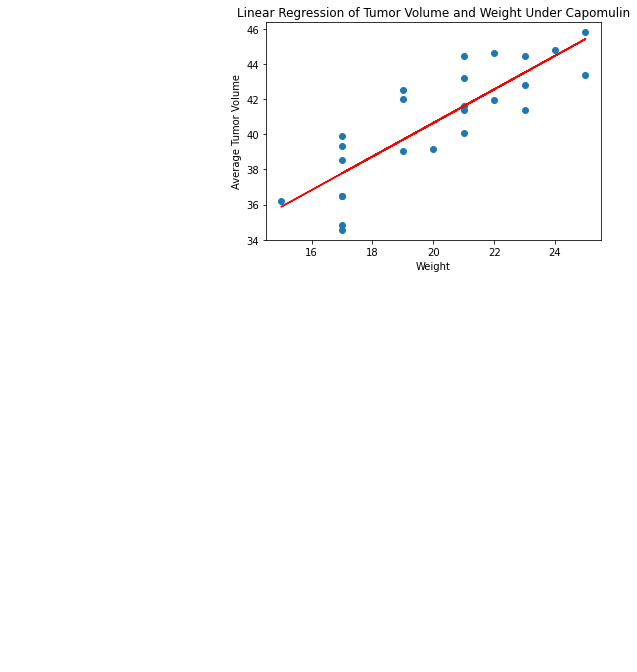

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_2, y_axis_2)
regress_values = x_axis_2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_2,y_axis_2)
plt.plot(x_axis_2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Linear Regression of Tumor Volume and Weight Under Capomulin")
plt.show()

In [37]:
print(f'The r-squared value is: {rvalue**2}.')

The r-squared value is: 0.7088568047708717.
